In [102]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
edits = pd.read_json("editSteps.json")
runs = pd.read_json("runSteps.json")

In [103]:
# when other occurred in edit, what is the % of other 

In [104]:
otherEdit = edits[(edits.otherResourcesTime > 0)|(edits.otherIssueTime > 0)|(edits.otherNotesTime > 0)|(edits.otherInteractionTime > 0)]
otherEdit.groupby("work").describe()

cycleTime                                                     \
                count        mean         std   min    25%    50%    75%   
work                                                                       
debugging       103.0  209.902913  195.556447  21.0   96.0  147.0  252.0   
programming      85.0  339.552941  358.595159  19.0  140.0  229.0  428.0   

                    activities            ... otherNotesTime         \
                max      count      mean  ...            75%    max   
work                                      ...                         
debugging    1206.0      103.0  3.902913  ...            0.0  146.0   
programming  1903.0       85.0  6.517647  ...            0.0  548.0   

            otherInteractionTime                                               \
                           count       mean         std  min  25%   50%   75%   
work                                                                            
debugging                  103.0  20.165049   34.441510  0.0  0.0   7.0  20.5   
programming                 85.0  57.752941  110.696916  0.0  0.0  16.0  69.0   

                    
               max  
work                
debugging    185.0  
programming  607.0  

[2 rows x 72 columns]

In [105]:
otherRun = runs[(runs.otherResourcesTime > 0)|(runs.otherIssueTime > 0)|(runs.otherNotesTime > 0)|(runs.otherInteractionTime > 0)]
otherRun.groupby("work").otherNotesTime.describe()

,count,mean,std,min,25%,50%,75%,max
work,,,,,,,,
debugging,7.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
programming,14.0,12.785714,40.01188,0.0,0.0,0.0,0.0,149.0


In [66]:
numberOfEditsDebugging,numberOfEditsProgramming  = edits.groupby("work").cycleTime.count()

In [67]:
numberOfEditsOtherResourcesDebugging,numberOfEditsOtherResourcesProgramming  = edits[edits["otherResourcesTime"]>0].groupby("work").cycleTime.count()
numberOfEditsOtherIssueDebugging,numberOfEditsOtherIssueProgramming  = edits[edits["otherIssueTime"]>0].groupby("work").cycleTime.count()
numberOfEditsOtherNoteDebugging,numberOfEditsOtherNoteProgramming  = edits[edits["otherNotesTime"]>0].groupby("work").cycleTime.count()
numberOfEditsOtherInteractionDebugging,numberOfEditsOtherInteractionProgramming  = edits[edits["otherInteractionTime"]>0].groupby("work").cycleTime.count()

In [75]:
otherEditResult = pd.DataFrame({"work":["debugging", "programming","debugging", "programming","debugging", "programming","debugging", "programming"],"characteristics": ["resources","resources",  "Issues","Issues", "Notes", "Notes","IDE", "IDE"], "percentage":[numberOfEditsOtherResourcesDebugging/ numberOfEditsDebugging*100,numberOfEditsOtherResourcesProgramming/ numberOfEditsProgramming*100,numberOfEditsOtherIssueDebugging/ numberOfEditsDebugging*100, numberOfEditsOtherIssueProgramming/ numberOfEditsProgramming*100,numberOfEditsOtherNoteDebugging/ numberOfEditsDebugging*100,numberOfEditsOtherNoteProgramming/ numberOfEditsProgramming*100,numberOfEditsOtherInteractionDebugging/ numberOfEditsDebugging*100,numberOfEditsOtherInteractionProgramming/ numberOfEditsProgramming*100 ]})



In [80]:
numberOfRunsDebugging,numberOfRunsProgramming  = runs.groupby("work").cycleTime.count()

In [83]:
numberOfRunsOtherResourcesDebugging,numberOfRunsOtherResourcesProgramming  = 0,runs[runs["otherResourcesTime"]>0].groupby("work").cycleTime.count()
numberOfRunsOtherIssueDebugging,numberOfRunsOtherIssueProgramming  = runs[runs["otherIssueTime"]>0].groupby("work").cycleTime.count()
numberOfRunsOtherNoteDebugging,numberOfRunsOtherNoteProgramming  = 0,runs[runs["otherNotesTime"]>0].groupby("work").cycleTime.count()
numberOfRunsOtherInteractionDebugging,numberOfRunsOtherInteractionProgramming  = runs[runs["otherInteractionTime"]>0].groupby("work").cycleTime.count()

In [84]:
otherRunResult = pd.DataFrame({"work":["debugging", "programming","debugging", "programming","debugging", "programming","debugging", "programming"],"characteristics": ["resources","resources",  "Issues","Issues", "Notes", "Notes","IDE", "IDE"], "percentage":[numberOfRunsOtherResourcesDebugging/ numberOfRunsDebugging*100,numberOfRunsOtherResourcesProgramming/ numberOfRunsProgramming*100,numberOfRunsOtherIssueDebugging/ numberOfRunsDebugging*100, numberOfRunsOtherIssueProgramming/ numberOfRunsProgramming*100,numberOfRunsOtherNoteDebugging/ numberOfRunsDebugging*100,numberOfRunsOtherNoteProgramming/ numberOfRunsProgramming*100,numberOfRunsOtherInteractionDebugging/ numberOfRunsDebugging*100,numberOfRunsOtherInteractionProgramming/ numberOfRunsProgramming*100 ]})

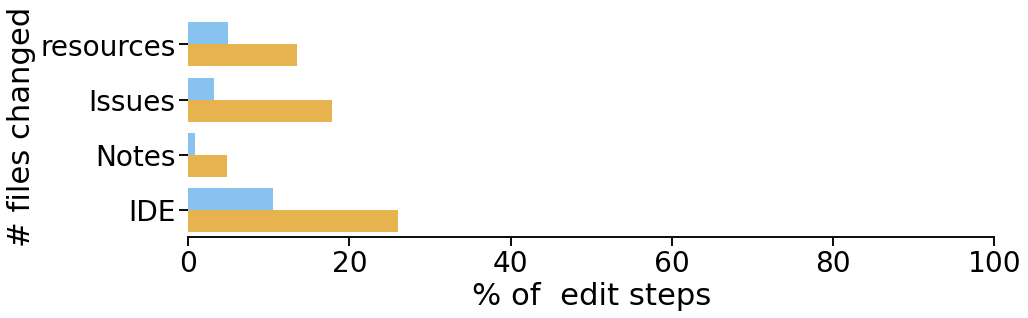

In [96]:
sns.set_context("talk", font_scale=1.7)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar',   data=otherEditResult,palette={"programming": "#FFBB35", "debugging": "#77C5FF"},  orient="h", ci=None, height=5, aspect=3,sharey=False, legend=False)

(g.set_axis_labels("% of  edit steps", "# files changed")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
g.tight_layout()
plt.savefig("otherEditChara.pdf")

In [101]:
sns.set_context("talk", font_scale=1.7)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar',data=otherRunResult,palette={"programming": "#FFBB35", "debugging": "#77C5FF"},  orient="h", ci=None, height=5, aspect=3,sharey=False, legend=False)

(g.set_axis_labels("% of  run steps", "# files changed")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 10))
  .despine(left=True))  
g.tight_layout()
plt.savefig("otherRunChara.pdf")

TypeError: Horizontal orientation requires numeric `x` variable.